<a href="https://colab.research.google.com/github/majidahmadics/Machine-Learning-Projects/blob/main/RNN_for_Asset_Pricing/RNN_for_Asset_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [15]:
# Initialize
ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2024-01-01"

In [16]:
# Step 1: Load and preprocess the data
data = yf.download(ticker, start= start_date, end= end_date)
prices = data['Close'].values.reshape(-1, 1)  # Assuming 'Close' column contains the prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

[*********************100%%**********************]  1 of 1 completed


In [17]:
# Step 2: Prepare the data for training
window_size = 20  # Number of previous time steps to consider
X, y = [], []
for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i - window_size:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)

# Reshape input data for RNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [18]:
# Step 3: Define the RNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [19]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Step 5: Train the model
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
8/8 [==============================] - 3s 14ms/step - loss: 1.4099
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3644
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.1616
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.1549
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.1178
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0970
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0828
Epoch 8/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0780
Epoch 9/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0850
Epoch 10/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0730
Epoch 11/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0614
Epoch 12/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0481
Epoch 13/50
8/8 [==============================] - 0s 10ms/st

In [21]:
# Step 6: Make predictions
predictions = model.predict(X)

8/8 [==============================] - 0s 5ms/step


In [22]:
predicted_prices = scaler.inverse_transform(predictions)

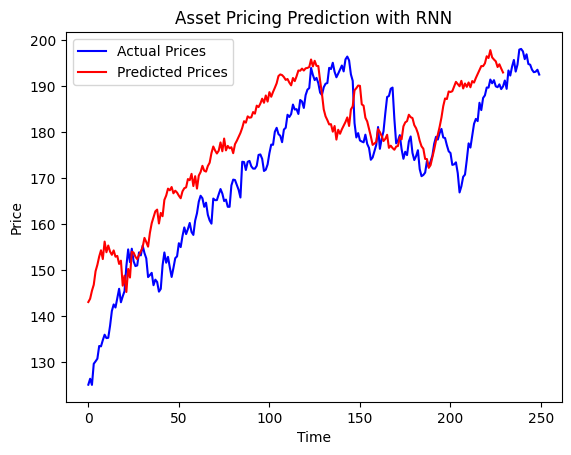

In [25]:
# Step 8: Visualize the results
plt.plot(prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Asset Pricing Prediction with RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
# Step 9: Evaluate the model
mae = mean_absolute_error(prices[window_size:], predicted_prices)
mse = mean_squared_error(prices[window_size:], predicted_prices)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2.8645970883576766
Mean Squared Error (MSE): 14.278627500272073
Root Mean Squared Error (RMSE): 3.7787071202028972


In [27]:
# Calculate the range of the target variable
price_range = np.max(prices) - np.min(prices)

# Normalize the error metrics
normalized_mae = mae / price_range
normalized_mse = mse / (price_range ** 2)
normalized_rmse = rmse / price_range

print("Normalized Mean Absolute Error (NMAE):", normalized_mae)
print("Normalized Mean Squared Error (NMSE):", normalized_mse)
print("Normalized Root Mean Squared Error (NRMSE):", normalized_rmse)

Normalized Mean Absolute Error (NMAE): 0.039192734065794564
Normalized Mean Squared Error (NMSE): 0.0026728248043516507
Normalized Root Mean Squared Error (NRMSE): 0.0516993694773123
